# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

# Choosing the Best Location to Open a Turkish Restaurant in Bucharest, Romania

### Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

### Background

Bucharest is the capital and largest city of Romania, as well as its cultural, industrial, and financial center. It is located in the southeast of the country, at coordinates:  44°25′57″N 26°06′14″E, less than 60 km (37.3 mi) north of the Danube River and the Bulgarian border.  

Bucharest is the center of the Romanian economy and industry, accounting for around 24% (2017) of the country's GDP and about one-quarter of its industrial production, while being inhabited by 9% of the country's population. Bucharest has 1.883.425 (2018) populations and consists of 6 sectors. Neighborhoods and populations in sectors are as below (2016): 

*	Sector 1 (population 227,717): Dorobanți, Băneasa, Aviației, Pipera, Primăverii, Dămăroaia, Grivița
*	Sector 2 (population 357,338): Pantelimon, Colentina, Iancului, Tei, Floreasca, Moșilor, Obor, Fundeni, 
*	Sector 3 (population 399,231): Vitan, Dudești, Titan, Centrul Civic, Dristor, Lipscani
*	Sector 4 (population 300,331): Berceni, Olteniței,  Progresul, Văcărești, Tineretului
*	Sector 5 (population 288,690): Rahova, Ferentari, Giurgiului, Cotroceni, 13 Septembrie, Dealul Spirii
*	Sector 6 (population 371,060): Giulești, Crângași, Drumul Taberei, Militari, Grozăvești(Regie), Ghencea

As stated by the Mercer international surveys for quality of life in 231 cities around the world, Bucharest occupied the 109th place in 2019. Bucharest, at number 109, ranks low in the European list but better than other European cities such as Sofia (116th) and Belgrade (139th).

Many neighborhoods, particularly in the southern part of the city, lack sufficient green space, are formed of cramped high density block of flats. This may affect people’s life as well. 



### Problem

This project aims to select the best location in Bucharest, Romania for opening a Turkish restaurant. 

### Interest

This project would be of interest to any entrepreneur who wants to open a new Turkish restaurant in Bucharest, Romania. In addition, the project can be modified for use to determine the best location to open a restaurant in any geeographic location, and thus would be of interest more widely for any one who wants to open a restaurant or even any business where location is a key factor to the success of the business. 

## Data <a name="data"></a>

### Data Sources

To answer the business problem I will utilise the below data sources:
    
* Sector data of Bucharest - from Wikipedia
* Neighbourhood data of Bucharest - from Wikipedia
* Geographical coordinates of neighborhoods - retrieved using Python geocoder library 
* Venues of given neighborhoods of Bucharest - retrieved using Foursquare API venues explore method 
* Ranks and likes of restaurants by given venue id - retrieved using Foursquare API venues method 

### Feature Selection and Data Usage

* I will use neighborhood location values to analyse Bucharest's geographical structure. I will use folium library of python to draw maps by using given latitude and longitudes of neighborhoods 
* I will use populations of neighborhoods to determine neighbourhoods with large-sized populations whichh may need a new restaurant
* I will also classify neighborhoods by using venues distribution and counts. In this way, I will find similarities between neighborhoods which will help me to choose a location for opening a new restaurant. Similarly structured neighborhoods may be conducive to the same type of venue/restaurant/business
* I will use venue list category to find distribution of restaurants and Turkish restaurants in neighborhoods
* I will also use ratings and likes of restaurants in the areas. This will help to find locations with poorly rated restaurants which may consequently desire the introduction of a new restaurant

#### Import Libraries

In [2]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder

     |████████████████████████████████| 102kB 8.5MB/s ta 0:00:011
     |████████████████████████████████| 102kB 7.0MB/s ta 0:00:011


In [3]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
# how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k video
from bs4 import BeautifulSoup 
import pandas as pd
import requests

print('Libraries imported.')

Libraries imported.


#### Get Geocoordinates of Bucharest, Romania

In [4]:
# get coordinates of Bucharest
bucharest_address = 'Bucharest, Romania'

geolocator = Nominatim(user_agent="bucharest_explorer")
location = geolocator.geocode(bucharest_address)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(bucharest_address, latitude, longitude))

The geograpical coordinate of Bucharest, Romania are 44.4361414, 26.1027202.


#### Get Neighbourhood Data of Bucharest

In [5]:
# Read Bucharest neighborhood data 
url = "https://en.wikipedia.org/wiki/Category:Districts of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Bucharest',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("There are {} neighborhoods in {}".format(df_neighborhood.shape[0], bucharest_address))

There are 40 neighborhoods in Bucharest, Romania


#### Get Neighbourhood Sectors and Population of Sectors

In [6]:
# Read Bucharest sector data from wikipedia
url = "https://en.wikipedia.org/wiki/Sectors of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorPopList = []
sectorPopulationList = []

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Population (October 2011)" in header:
        i = 0
        for td in row.find_all("td"):
            i+=1
            if i==2: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==3: 
                sectorPopulationList.append(td.text.replace("\n",""))    
                i=0

df_sectorPop = pd.DataFrame({"Sector": sectorPopList, "Population": sectorPopulationList})

sectorNeigList =[]
sectorNeigborList =[]

for row in soup.find_all("ul"):
    if sectorPopList[0] in  row.text:
        for s in row.text.split("\n"):
            sectorNeigList.append(s.split(":")[0])
            sectorNeigborList.append(s.split(":")[1])
    
df_sector= pd.DataFrame({"Sector": sectorNeigList, "Neigborhoods": sectorNeigborList}).merge(df_sectorPop,on='Sector' )

print("There are {} Sectors in {}".format(df_sector.shape[0], bucharest_address))
df_sector

There are 6 Sectors in Bucharest, Romania


,Sector,Neigborhoods,Population
0,Sector 1,"Dorobanți, Băneasa, Aviației, Pipera, Aviator...","225,454"
1,Sector 2,"Pantelimon, Colentina, Iancului, Tei, Floreas...","345,370"
2,Sector 3,"Vitan, Dudești, Titan, Centrul Civic, Balta A...","385,439"
3,Sector 4,"Berceni, Olteniței, Văcărești, Timpuri Noi, T...","287,828"
4,Sector 5,"Rahova, Ferentari, Giurgiului, Cotroceni, 13 ...","271,575"
5,Sector 6,"Giulești, Crângași, Drumul Taberei, Militari,...","367,760"


#### Set Sectors of Neighbourhoods

In [7]:
def getSector(row):
    for i in range(df_sector.shape[0]):
        if row["Neighborhood"] in  df_sector.iloc[i].Neigborhoods:
            return pd.Series([df_sector.iloc[i].Sector, df_sector.iloc[i].Population], index = ['Sector','SectorPopulation'])

df_neighborhood[["Sector","SectorPopulation"]] =df_neighborhood.apply(getSector, axis=1)
df_neighborhood.head(5)

,Neighborhood,Sector,SectorPopulation
0,Aviației,Sector 1,"225,454"
1,Băneasa,Sector 1,"225,454"
2,Berceni,Sector 4,"287,828"
3,Bucureștii Noi,Sector 1,"225,454"
4,Centrul Civic,Sector 3,"385,439"


#### Get Geographical Coordinates of Neighbourhoods

In [9]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,bucharest_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Sector,SectorPopulation,Latitude,Longitude
0,Aviației,Sector 1,"225,454",44.485790,26.101220
1,Băneasa,Sector 1,"225,454",44.494010,26.080372
2,Berceni,Sector 4,"287,828",44.386200,26.128960
3,Bucureștii Noi,Sector 1,"225,454",44.484495,26.039608
4,Centrul Civic,Sector 3,"385,439",44.434300,26.094660


#### Create Bucharest Map with Neighbourhoods Superimposed

In [10]:
#create map of Bucharest neighborhoods using latitude and longitude values
map_bucharest= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bucharest)  
    
map_bucharest

#### Explore Venues in Bucharest Neighbourhoods

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id=USELJRHVN1R41XO1ZW1HOO2NOK32234A3VR5CCDCET5AX1RG&client_secret=GJ512QPIGSHZRWHOZWHMQEFIGBUHSAQ5L15ZWTWCN3JDXS5T&v=20200711&ll=44.4361414,26.1027202&radius=10000&limit=100".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 46 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Aviației,44.48579,26.10122,"Teatrul Național ""I. L. Caragiale""",4ba85262f964a52079d639e3,44.436570,26.103638,87,Theater
1,Aviației,44.48579,26.10122,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place
2,Aviației,44.48579,26.10122,Cărturești Carusel,5377cb5111d2b93afe516785,44.431918,26.101617,478,Bookstore
3,Aviației,44.48579,26.10122,Antic ExLibris,4f61ab7be4b0a20e1dfe4145,44.433489,26.102379,296,Used Bookstore
4,Aviației,44.48579,26.10122,Grand Hotel Continental,4bcf72440ffdce72e67cb2c0,44.437294,26.098081,390,Hotel


In [13]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Coffee Shop,18
Hotel,8
Dessert Shop,6
Park,3
Pizza Place,3
Bar,3
Romanian Restaurant,3
Italian Restaurant,3
Burger Joint,3


#### Filter Restaurants Out of All Venues

In [14]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place']
turkish_restaurant_list = ['Turkish Restaurant', 'Doner Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
turkish_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Turkish restaurants:', len(turkish_restaurants['VenueId'].unique()))
print('Percentage of Turkish restaurants: {:.2f}%'.format(len(turkish_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 20
Total number of Turkish restaurants: 0
Percentage of Turkish restaurants: 0.00%


40 neighborhoods do not have any Turkish restaurant


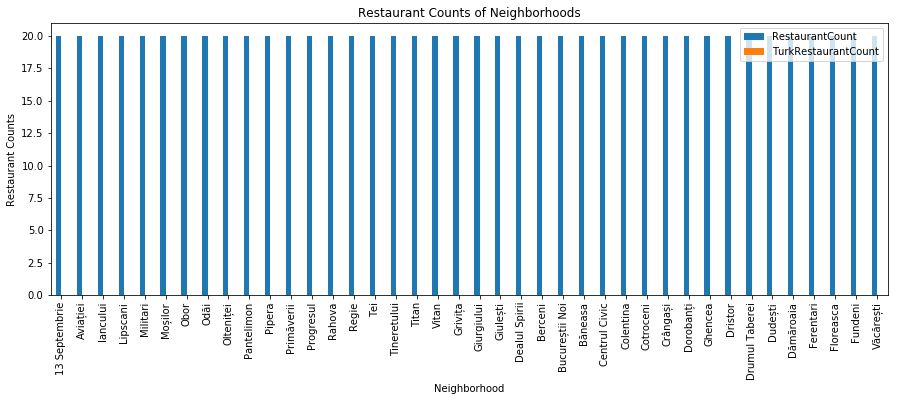

In [15]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Turkish restaurants in each Neighborhood
df_turk_rest_counts =  turkish_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "TurkRestaurantCount"})[['TurkRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(turkish_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_turk_rest_counts = df_turk_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'TurkRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_turk_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_turk_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Turkish restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','TurkRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

We can see from the Graph :

* The number of restaurants in neighbourhoods is largely consistent across the different neighbourhoods
* There is an absence of Turkish restaurants in all neighbourhoods, thus suggesting a market gap
* Any of the neighbourhoods would consequently be suitable for opening a new Turkish restaurant. To filter more, let's continue

#### Get Restaurants' Overall Rating

In [16]:
def getVenueRatings(venues):
    
    ratings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id=USELJRHVN1R41XO1ZW1HOO2NOK32234A3VR5CCDCET5AX1RG&client_secret=GJ512QPIGSHZRWHOZWHMQEFIGBUHSAQ5L15ZWTWCN3JDXS5T&v=20200711'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        ratings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(ratings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_ratings = getVenueRatings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_ratings.head()

,VenueId,VenueRating,VenueLikes
0,584eb605f9edc530cd730d3b,9.0,42
1,59089c6b535d6f4b57d0b699,9.2,23
2,4bc9e18cfb84c9b68eca1b3e,8.5,604
3,56a40097498e12d32c477347,8.9,117
4,4db2d15d6a23c31a02f32f6b,8.2,557


In [17]:
#merge ratings to restaurants 
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_ratings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,44.485790,26.101220,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
1,Băneasa,44.494010,26.080372,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
2,Berceni,44.386200,26.128960,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
3,Bucureștii Noi,44.484495,26.039608,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
4,Centrul Civic,44.434300,26.094660,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42


#### Show Restaurants on Heat Map

Let's create a map showing heatmap / density of restaurants and try to extract some meaningfull information from that. Also, let's show borders of Bucharest on our map and a few circles indicating distance of 2km, 4km, 6km and 10km from Bucharest center

Purple markers are restaurants

Blue markers are restaurants with ratings of less than 7

In [18]:
bucharest_center = [latitude, longitude]
map_restaurant= folium.Map(location=bucharest_center, zoom_start=12)
df_neighborhood_noturkrest = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_bucharest) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(bucharest_center).add_to(map_bucharest)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(neighborhood_restaurants['VenueLatitude'], neighborhood_restaurants['VenueLongitude'], neighborhood_restaurants['Neighborhood'], neighborhood_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_restaurant)
       
rating_lt_7 = neighborhood_restaurants[neighborhood_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(rating_lt_7['VenueLatitude'], rating_lt_7['VenueLongitude'], rating_lt_7['Neighborhood'], rating_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

From the heat map, we can see that there are:

* Too many restaurants in 2 km to the center
* Enough restaurants between 2-4 km to the center
* There are not many restaurants after 4 - 10 km to center
* Generally the restaurants are highly rated

## Methodology

### Cluster Neigborhoods using Agglomerative Clustering

In [19]:
# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

40  neighborhoods' venue category are shown in 46 columns as below


,Neighborhood,Theater,Pizza Place,Bookstore,Used Bookstore,Hotel,Dessert Shop,Concert Hall,Coffee Shop,Monastery,Gym / Fitness Center,Park,Ice Cream Shop,Roof Deck,Clothing Store,Plaza,Cosmetics Shop,Camera Store,Burger Joint,Beer Garden,Gym,Pub,Gastropub,Nightclub,Art Museum,Church,Supermarket,Café,Salad Place,Cocktail Bar,Italian Restaurant,Wine Bar,French Restaurant,Bar,Romanian Restaurant,Soup Place,Bistro,Salon / Barbershop,Mediterranean Restaurant,Cupcake Shop,Palace,Tea Room,Accessories Store,Bakery,Restaurant,Sushi Restaurant,Japanese Restaurant
0,13 Septembrie,2,3,2,1,8,6,1,18,1,1,3,2,2,1,2,2,1,3,2,2,1,2,1,1,1,1,2,1,1,3,1,1,3,3,1,2,1,2,1,1,1,1,2,1,1,1
1,Aviației,2,3,2,1,8,6,1,18,1,1,3,2,2,1,2,2,1,3,2,2,1,2,1,1,1,1,2,1,1,3,1,1,3,3,1,2,1,2,1,1,1,1,2,1,1,1
2,Berceni,2,3,2,1,8,6,1,18,1,1,3,2,2,1,2,2,1,3,2,2,1,2,1,1,1,1,2,1,1,3,1,1,3,3,1,2,1,2,1,1,1,1,2,1,1,1
3,Bucureștii Noi,2,3,2,1,8,6,1,18,1,1,3,2,2,1,2,2,1,3,2,2,1,2,1,1,1,1,2,1,1,3,1,1,3,3,1,2,1,2,1,1,1,1,2,1,1,1
4,Băneasa,2,3,2,1,8,6,1,18,1,1,3,2,2,1,2,2,1,3,2,2,1,2,1,1,1,1,2,1,1,3,1,1,3,3,1,2,1,2,1,1,1,1,2,1,1,1


In [20]:
# create a new dataframe with most common venue categories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,13 Septembrie,100,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place,Burger Joint,Bar,Park,Romanian Restaurant,Ice Cream Shop
1,Aviației,100,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place,Burger Joint,Bar,Park,Romanian Restaurant,Ice Cream Shop
2,Berceni,100,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place,Burger Joint,Bar,Park,Romanian Restaurant,Ice Cream Shop
3,Bucureștii Noi,100,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place,Burger Joint,Bar,Park,Romanian Restaurant,Ice Cream Shop
4,Băneasa,100,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place,Burger Joint,Bar,Park,Romanian Restaurant,Ice Cream Shop


#### Cluster and find similarities between neighborhoods

I will use hierarchical agglomerative clustering method to compare neighborhoods among neighborhoods

First, find the number of clusters. Let's use scipy library to create the dendrograms for our dataset

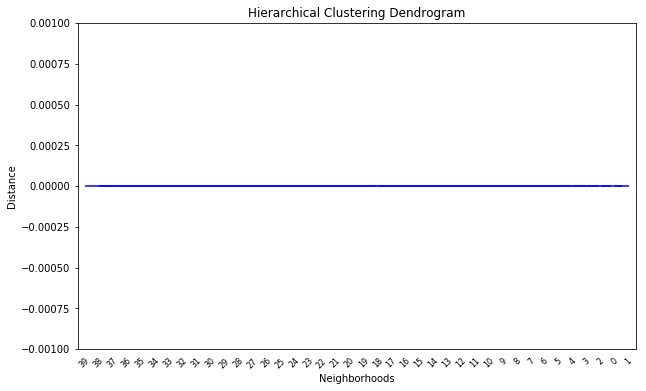

In [24]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

According to the above graph, I decide to separate our neighborhoods into 6 clusters (cut at distance of 20, horizontal black line). I will use the hierarchical agglomerative clustering of the sklearn.cluster library to cluster these neighborhoods.

In [29]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant', '4th Most Common Restaurant', '5th Most Common Restaurant']])
venues_cluster.head()

,Neighborhood,Sector,SectorPopulation,Latitude,Longitude,NeighborhoodCluster,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant
0,Aviației,Sector 1,"225,454",44.485790,26.101220,0,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place
1,Băneasa,Sector 1,"225,454",44.494010,26.080372,0,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place
2,Berceni,Sector 4,"287,828",44.386200,26.128960,0,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place
3,Bucureștii Noi,Sector 1,"225,454",44.484495,26.039608,0,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place
4,Centrul Civic,Sector 3,"385,439",44.434300,26.094660,0,Coffee Shop,Hotel,Dessert Shop,Italian Restaurant,Pizza Place


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster, sector,SectorPopulation  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster'], venues_cluster['Sector'],venues_cluster['SectorPopulation']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(sector) + ' ' + str(SectorPopulation), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(bucharest_center).add_to(map_clusters)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

Here we look at the top 5 most common restaurants for the Neighborhood Cluster as was done above for the Neighborhoods.

In [40]:
print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant','2nd Most Common Restaurant']).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster.groupby(['NeighborhoodCluster','3rd Most Common Restaurant', '4th Most Common Restaurant','5th Most Common Restaurant'  ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                                           Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant 2nd Most Common Restaurant                    
0                   Coffee Shop                Hotel                                       35
1                   Coffee Shop                Hotel                                        1
2                   Coffee Shop                Hotel                                        1
3                   Coffee Shop                Hotel                                        1
4                   Coffee Shop                Hotel                                        1
5                   Coffee Shop                Hotel                                        1


,,,,Neighborhood Count
NeighborhoodCluster,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,
0,Dessert Shop,Italian Restaurant,Pizza Place,35
1,Dessert Shop,Italian Restaurant,Pizza Place,1
2,Dessert Shop,Italian Restaurant,Pizza Place,1
3,Dessert Shop,Italian Restaurant,Pizza Place,1
4,Dessert Shop,Italian Restaurant,Pizza Place,1
5,Dessert Shop,Italian Restaurant,Pizza Place,1


## Results

I investigated that Turkish restaurant counts in Bucharest is 0.00%

*	Total number of restaurants: 20
*	Total number of Turkish restaurants: 0

From the bar chart, we can see
*	Vitan is the neighborhood having most restaurants
*	Dorobanti has lots of restaurants as well
*	Odai and Gluesti are neighborhoods having least number of restaurants

From the heat maps, we can see that there are
*	Too many restaurants in 2 km to the center
*	Enough restaurants between 2-4 km to the center
*	There are not many restaurants after 4 km to center

From the six clusters, we can see that the top 5 restaurant types are 
* Coffee shops
* Hotels
* Dessert shops
* Italian restaurants
* Pizza places 

The predominance of Italian restaurant might be taken to mean that people in Bucharest are open to cuisines from other countries.

## Discussion

As there are no Turkish restaurants in all the neighborhoods explored, all neighborhoods are potential options. However taking into account the other factors outlined in the Results sections such as the predominance of restaurants in certain neighborhoods, the high number of restaurants close to the centre, the below 4 neighborhoods are where I would suggest a Turkish restaurant be opened in Bucharest:


* Neighborhood : Regie , Cluster 0, Sector 6 , Population : 367760

I choosed Regie , since west part of Bucharest has not Turkish restaurant and Regie is close to center . Regie is red cluster which is same with the other 2 red markers having Turk restaurant. Red clusters populations may like Turkish food. 

* Neighborhood : Bucureștii Noi , Cluster 2, Sector 1 , Population : 225453

I choosed Bucharest-noi , since there is no Turkish restaurant here and because it is after 6 km distance to the centre where there are not too many restaurants. One restaurant will be good for this area.

* Neighborhood : Crângași , Cluster 2, Sector 6 , Population : 367760

I choosed Crangasi , since Crangasi is in the West part of Bucharest and from the bar chart we can see that this neighborhood does not have a lot of restaurants. Also this neighborhood is in Sector 6 and this sector has biggest population which will be ahandle one more restaurant 

* Neighborhood : Tineretului , Cluster 2, Sector 4 , Population : 287828

I choosed Tineretului , since Tineretului has not Turkish restaurant and from bar chart we can see that this neighborhood has not too much restaurant. 

## Conclusion

Using the data sources and methodologies outlined above, I was able to arrive at 4 possible neighborhoods where a Turkish restaurant can be opened.